In [7]:
# run in analysis-env kernel

import numpy as np
import pandas as pd
import statistics
from scipy.interpolate import interp1d

# import pylustrator
# pylustrator.start()

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import os
from datetime import datetime 
current_date = datetime.now().strftime('%y-%m-%d')

from skimage.io import imread

### dataframe functions

In [4]:
def resize_columns(df, desired_size):
    resized_data = {}

    for col in df.columns:
        
        original_array = df[col].dropna().values  # Drop NaN for clean interpolation
        indices = np.arange(len(original_array))
        interpolated_function = interp1d(indices, original_array, kind='linear', fill_value="extrapolate")
        new_indices = np.linspace(0, len(original_array) - 1, desired_size)
        resized_array = interpolated_function(new_indices)
        resized_data[col] = resized_array
    
    resized_df = pd.DataFrame(resized_data)

    return resized_df

# Function to apply moving average smoothing
def apply_moving_average(df, window_size):
    smoothed_df = df.copy()
    for column in df.columns:
        smoothed_df[column] = np.convolve(df[column], np.ones(window_size) / window_size, mode='same')
    return smoothed_df

def normalize_columns(df):
    """
    Normalize each column of the DataFrame by dividing each element by the maximum value of the column.
    """
    df_normalized = df.copy()
    for column in df.columns:
        # Normalize by dividing by the max value in the column
        max_value = df[column].max()
        if max_value != 0:  # Avoid division by zero
            df_normalized[column] = df[column] / max_value
        else:
            df_normalized[column] = df[column]  # If max_value is 0, don't change the column
    return df_normalized




# Intensity profiles from csv files

### combined plots

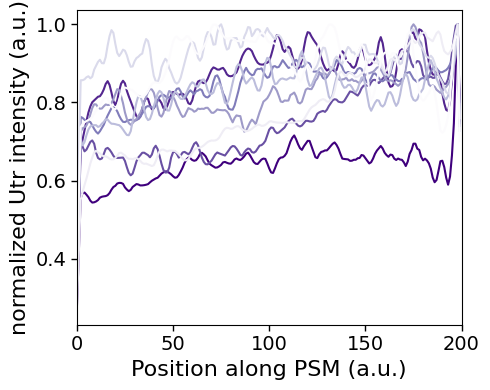

In [ ]:
# utrophin

file_path = "/Users/fnarslan/Documents/results_embryo/2D_intensity_profiles/utrophin_myosin_h2b/Book1.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path)
df = df.iloc[:, 1::2]  # Select only even-indexed columns (0-based indexing)
df_resized = resize_columns(df,200);
df_smooth = apply_moving_average(df_resized, 4);
df_norm = normalize_columns(df_smooth)
df = df_norm

colormap = plt.cm.Purples
norm = mcolors.Normalize(vmin=0, vmax=len(df.columns) - 1)  # Normalize to the number of columns

fig, ax = plt.subplots(figsize=(5, 4))

# Plot each column with the corresponding color from the Purples colormap
for i, column in enumerate(df.columns):
    # Reverse the colormap by mapping the index in reverse order
    color = colormap(norm(len(df.columns) - i - 1))  # Reversing the color map index
    plt.plot(df[column], color=color)

# Customize plot appearance
ax.tick_params(width=1, length=4, labelsize=14)  # Adjust tick size and style
plt.xlabel('Position along PSM (a.u.)', fontsize=16)  # X-axis label
plt.ylabel('normalized Utr intensity (a.u.)', fontsize=16)  # Y-axis label
plt.xlim([0,200])
plt.xticks(range(0, 201, 50))
plt.tight_layout()

# Save the plot 
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')  # Save plot in the same directory

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()



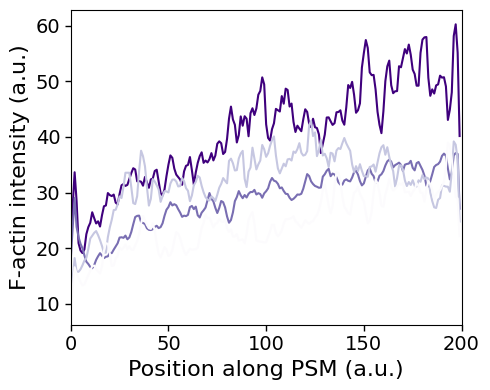

In [ ]:
# phalloidin 240902~17ss

file_path = "/Users/fnarslan/Documents/results_embryo/2D_intensity_profiles/phalloidin/line_profiles.xlsx"  # Replace with your actual file path
phal = pd.read_excel(file_path)
phal = phal.iloc[:, 1::2]  # Select only even-indexed columns (0-based indexing)
phal_resized = resize_columns(phal,200);
phal_smooth = apply_moving_average(phal_resized, 4);
# phal_norm = normalize_columns(phal_smooth)
phal = phal_smooth

colormap = plt.cm.Purples
norm = mcolors.Normalize(vmin=0, vmax=len(phal.columns) - 1)  # Normalize to the number of columns

fig, ax = plt.subplots(figsize=(5, 4))

# Plot each column with the corresponding color from the Purples colormap
for i, column in enumerate(phal.columns):
    # Reverse the colormap by mapping the index in reverse order
    color = colormap(norm(len(phal.columns) - i - 1))  # Reversing the color map index
    plt.plot(phal[column], color=color)

# Customize plot appearance
ax.tick_params(width=1, length=4, labelsize=14)  # Adjust tick size and style
plt.xlabel('Position along PSM (a.u.)', fontsize=16)  # X-axis label
plt.ylabel('F-actin intensity (a.u.)', fontsize=16)  # Y-axis label
plt.xlim([0,200])
plt.xticks(range(0, 201, 50))
plt.tight_layout()

# Save the plot 
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')  # Save plot in the same directory

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()



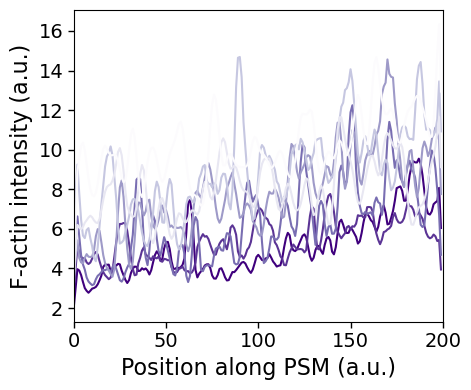

In [13]:
# phalloidin 250121-24ss


file_path = "//sv-nas1.rcp.epfl.ch/upoates/common/Feyza/data_BIOP/250121-phalORpmyo(phalgood,pmyookay,dapigood)/2d_phalloidin_intensity.xlsx"  # Replace with your actual file path
phal = pd.read_excel(file_path)
phal = phal.iloc[:, 1::2]  # Select only even-indexed columns (0-based indexing)
phal_resized = resize_columns(phal,200);
phal_smooth = apply_moving_average(phal_resized, 4);
phal_norm = normalize_columns(phal_smooth)
phal = phal_smooth

colormap = plt.cm.Purples
norm = mcolors.Normalize(vmin=0, vmax=len(phal.columns) - 1)  # Normalize to the number of columns

fig, ax = plt.subplots(figsize=(5, 4))

# Plot each column with the corresponding color from the Purples colormap
for i, column in enumerate(phal.columns):
    # Reverse the colormap by mapping the index in reverse order
    color = colormap(norm(len(phal.columns) - i - 1))  # Reversing the color map index
    plt.plot(phal[column], color=color)

# Customize plot appearance
ax.tick_params(width=1, length=4, labelsize=14)  # Adjust tick size and style
plt.xlabel('Position along PSM (a.u.)', fontsize=16)  # X-axis label
plt.ylabel('F-actin intensity (a.u.)', fontsize=16)  # Y-axis label
plt.xlim([0,200])
plt.xticks(range(0, 201, 50))
plt.tight_layout()

# Save the plot 
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')  # Save plot in the same directory

# plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()


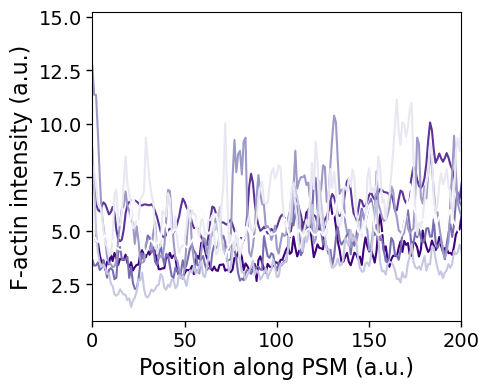

In [12]:
# phalloidin 250121-24ss-gullum


file_path = "//sv-nas1.rcp.epfl.ch/upoates/common/Feyza/data_BIOP/250121-phalORpmyo(phalgood,pmyookay,dapigood)/2d_phalloidin_intensity.xlsx"  # Replace with your actual file path
phal = pd.read_excel(file_path, sheet_name='24ss-gullum')
phal = phal.iloc[:, 1::2]  # Select only even-indexed columns (0-based indexing)
phal_resized = resize_columns(phal,200);
phal_smooth = apply_moving_average(phal_resized, 4);
phal_norm = normalize_columns(phal_smooth)
phal_gullum = phal_smooth

colormap = plt.cm.Purples
norm = mcolors.Normalize(vmin=0, vmax=len(phal.columns) - 1)  # Normalize to the number of columns

fig, ax = plt.subplots(figsize=(5, 4))

# Plot each column with the corresponding color from the Purples colormap
for i, column in enumerate(phal.columns):
    # Reverse the colormap by mapping the index in reverse order
    color = colormap(norm(len(phal.columns) - i - 1))  # Reversing the color map index
    plt.plot(phal[column], color=color)

# Customize plot appearance
ax.tick_params(width=1, length=4, labelsize=14)  # Adjust tick size and style
plt.xlabel('Position along PSM (a.u.)', fontsize=16)  # X-axis label
plt.ylabel('F-actin intensity (a.u.)', fontsize=16)  # Y-axis label
plt.xlim([0,200])
plt.xticks(range(0, 201, 50))
plt.tight_layout()

# Save the plot 
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')  # Save plot in the same directory

# plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()


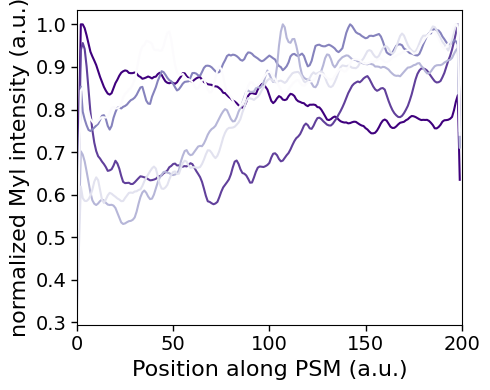

In [6]:
# myosin12.1

file_path = "/Users/fnarslan/Documents/results_embryo/2D_intensity_profiles/utrophin_myosin_h2b/Book1.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='myl')
df = df.iloc[:, 1::2]  # Select only even-indexed columns (0-based indexing)
df_resized = resize_columns(df,200);
df_smooth = apply_moving_average(df_resized, 4);
df_norm = normalize_columns(df_smooth)
df = df_norm

colormap = plt.cm.Purples
norm = mcolors.Normalize(vmin=0, vmax=len(df.columns) - 1)  # Normalize to the number of columns

fig, ax = plt.subplots(figsize=(5, 4))

# Plot each column with the corresponding color from the Purples colormap
for i, column in enumerate(df.columns):
    # Reverse the colormap by mapping the index in reverse order
    color = colormap(norm(len(df.columns) - i - 1))  # Reversing the color map index
    plt.plot(df[column], color=color)

# Customize plot appearance
ax.tick_params(width=1, length=4, labelsize=14)  # Adjust tick size and style
plt.xlabel('Position along PSM (a.u.)', fontsize=16)  # X-axis label
plt.ylabel('normalized Myl intensity (a.u.)', fontsize=16)  # Y-axis label
plt.xlim([0,200])
plt.xticks(range(0, 201, 50))
plt.tight_layout()

# Save the plot 
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')  # Save plot in the same directory

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()





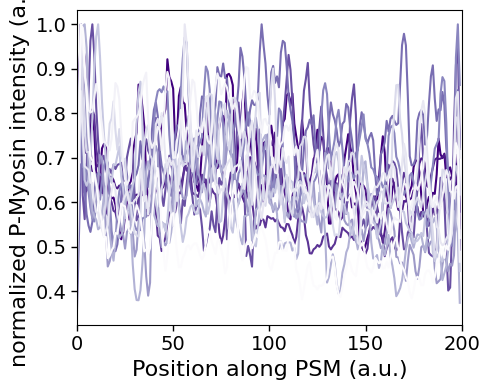

In [9]:
# p-myosin 241206

file_path = "/Users/fnarslan/Documents/results_embryo/2D_intensity_profiles/pmyosin/line_profiles.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path)
df = df.iloc[:, 1::2]  # Select only even-indexed columns (0-based indexing)
df_resized = resize_columns(df,200);
df_smooth = apply_moving_average(df_resized, 4);
df_norm = normalize_columns(df_smooth)
df = df_norm

colormap = plt.cm.Purples
norm = mcolors.Normalize(vmin=0, vmax=len(df.columns) - 1)  # Normalize to the number of columns

fig, ax = plt.subplots(figsize=(5, 4))

# Plot each column with the corresponding color from the Purples colormap
for i, column in enumerate(df.columns):
    # Reverse the colormap by mapping the index in reverse order
    color = colormap(norm(len(df.columns) - i - 1))  # Reversing the color map index
    plt.plot(df[column], color=color)

# Customize plot appearance
ax.tick_params(width=1, length=4, labelsize=14)  # Adjust tick size and style
plt.xlabel('Position along PSM (a.u.)', fontsize=16)  # X-axis label
plt.ylabel('normalized P-Myosin intensity (a.u.)', fontsize=16)  # Y-axis label
plt.xlim([0,200])
plt.xticks(range(0, 201, 50))
plt.tight_layout()

# Save the plot 
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')  # Save plot in the same directory

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()





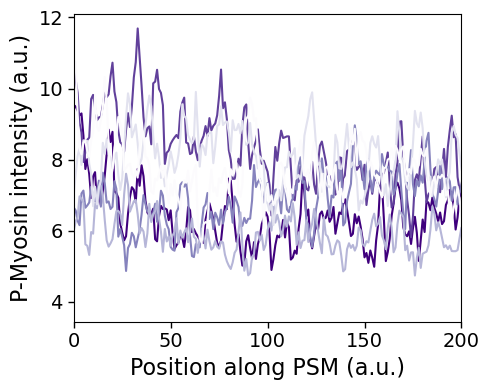

In [31]:
# p-myosin 250122-24ss

file_path = "//sv-nas1.rcp.epfl.ch/upoates/common/Feyza/data_BIOP/250121-phalORpmyo(phalgood,pmyookay,dapigood)/2d_pmyo_intensity.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path)
df = df.iloc[:, 1::2]  # Select only even-indexed columns (0-based indexing)
df_resized = resize_columns(df,200);
df_smooth = apply_moving_average(df_resized, 4);
#df_norm = normalize_columns(df_smooth)
pmyo = df_smooth

colormap = plt.cm.Purples
norm = mcolors.Normalize(vmin=0, vmax=len(df.columns) - 1)  # Normalize to the number of columns

fig, ax = plt.subplots(figsize=(5, 4))

# Plot each column with the corresponding color from the Purples colormap
for i, column in enumerate(df.columns):
    # Reverse the colormap by mapping the index in reverse order
    color = colormap(norm(len(df.columns) - i - 1))  # Reversing the color map index
    plt.plot(df[column], color=color)

# Customize plot appearance
ax.tick_params(width=1, length=4, labelsize=14)  # Adjust tick size and style
plt.xlabel('Position along PSM (a.u.)', fontsize=16)  # X-axis label
plt.ylabel('P-Myosin intensity (a.u.)', fontsize=16)  # Y-axis label
plt.xlim([0,200])
plt.xticks(range(0, 201, 50))
plt.tight_layout()

# Save the plot 
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')  # Save plot in the same directory

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()





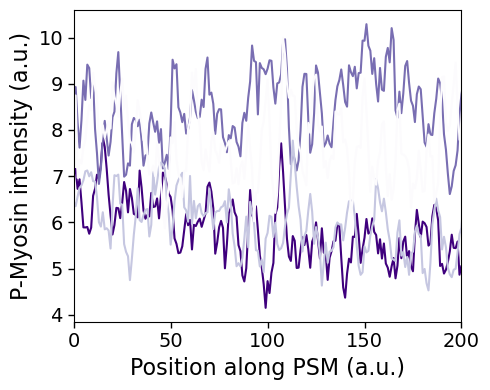

In [32]:
# p-myosin 250122-24ss-gullum

file_path = "//sv-nas1.rcp.epfl.ch/upoates/common/Feyza/data_BIOP/250121-phalORpmyo(phalgood,pmyookay,dapigood)/2d_pmyo_intensity.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='24ss-gullum')
df = df.iloc[:, 1::2]  # Select only even-indexed columns (0-based indexing)
df_resized = resize_columns(df,200);
df_smooth = apply_moving_average(df_resized, 4);
#df_norm = normalize_columns(df_smooth)
pmyo_gullum = df_smooth

colormap = plt.cm.Purples
norm = mcolors.Normalize(vmin=0, vmax=len(df.columns) - 1)  # Normalize to the number of columns

fig, ax = plt.subplots(figsize=(5, 4))

# Plot each column with the corresponding color from the Purples colormap
for i, column in enumerate(df.columns):
    # Reverse the colormap by mapping the index in reverse order
    color = colormap(norm(len(df.columns) - i - 1))  # Reversing the color map index
    plt.plot(df[column], color=color)

# Customize plot appearance
ax.tick_params(width=1, length=4, labelsize=14)  # Adjust tick size and style
plt.xlabel('Position along PSM (a.u.)', fontsize=16)  # X-axis label
plt.ylabel('P-Myosin intensity (a.u.)', fontsize=16)  # Y-axis label
plt.xlim([0,200])
plt.xticks(range(0, 201, 50))
plt.tight_layout()

# Save the plot 
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')  # Save plot in the same directory

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()





### single plots

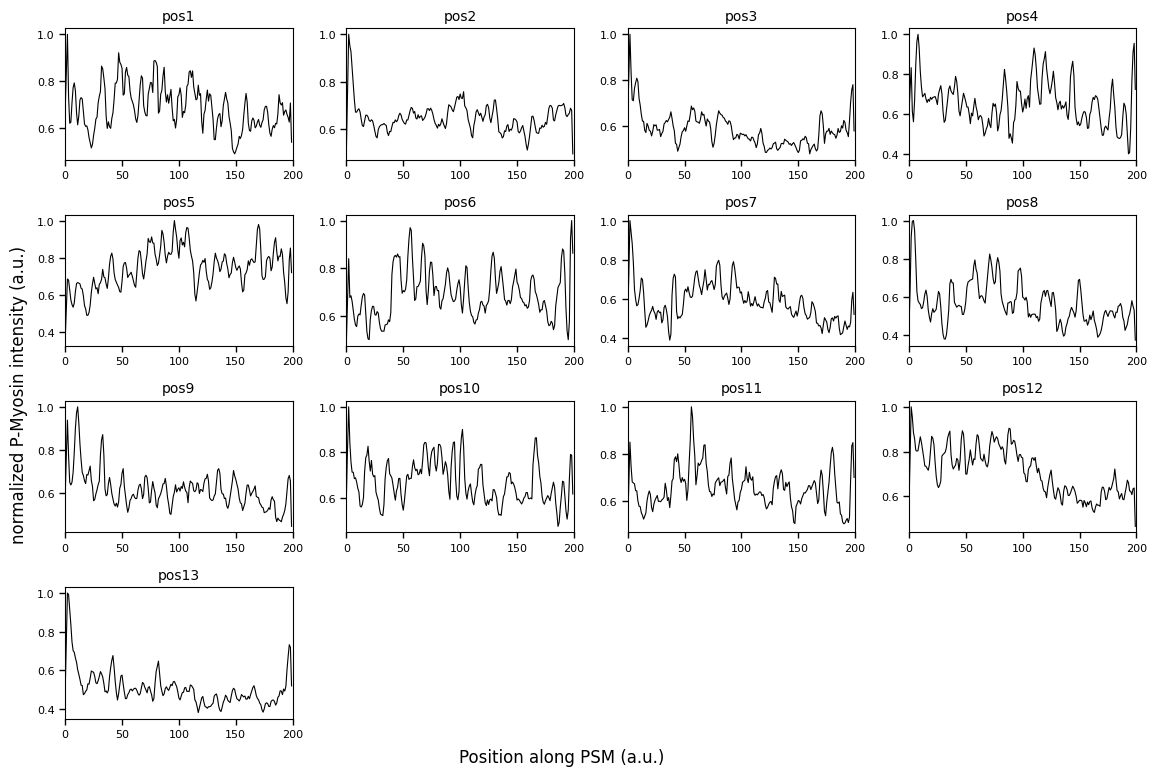

In [ ]:
# p-myosin 241206
# Set up the figure for a panel of 4x3 subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 8))  # Adjust figsize to fit the panel
axes = axes.flatten()  # Flatten the axes for easy iteration

# Plot each column in the panel
for i, column in enumerate(df.columns):
    ax = axes[i]
    ax.plot(df[column], color='black', linewidth=0.8)  # Black line, smaller width
    
    # Customize each subplot
    ax.set_xlim([0, 200])
    ax.set_xticks(range(0, 201, 50))
    ax.tick_params(width=1, length=4, labelsize=8)  # Smaller ticks and labels
    ax.set_title(column, fontsize=10)  # Add column name as title

# Remove any unused subplots
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

# Add global labels
fig.text(0.5, 0.04, 'Position along PSM (a.u.)', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'normalized P-Myosin intensity (a.u.)', va='center', rotation='vertical', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Make space for global labels

# Save the panel plot
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'_plot_{current_date}_{file_name}.svg')  # Save panel plot

plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


### mean and std

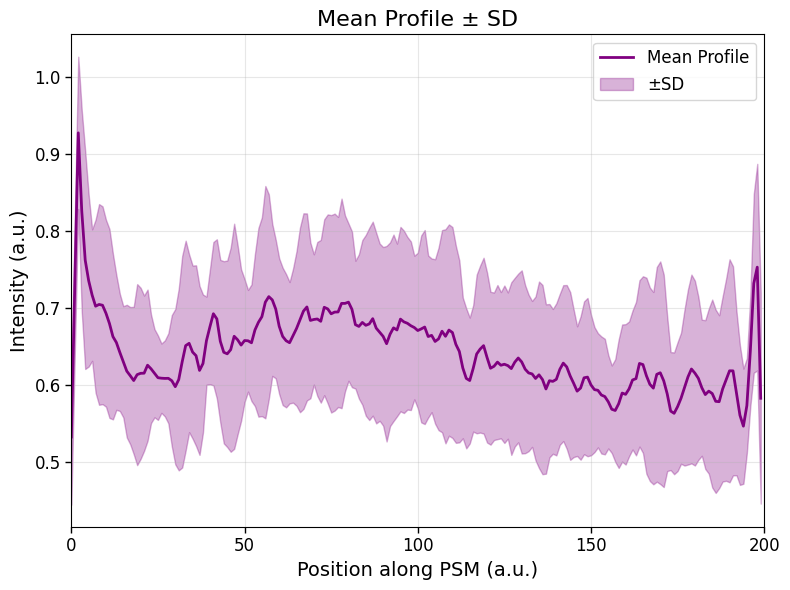

In [ ]:
# myosin-P 241206
mean_profile = df.mean(axis=1)
std_profile = df.std(axis=1)

x = np.arange(len(mean_profile))

# Create a single plot
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(mean_profile, color='purple', linewidth=2, label='Mean Profile')
ax.fill_between(x, mean_profile - std_profile, mean_profile + std_profile, color='purple', alpha=0.3, label='±SD')

# Customize the plot appearance
ax.set_xlabel('Position along PSM (a.u.)', fontsize=14)
ax.set_ylabel('Intensity (a.u.)', fontsize=14)
ax.tick_params(width=1, length=4, labelsize=12)
ax.set_xlim([0, 200])
ax.set_xticks(range(0, 201, 50))
ax.legend(fontsize=12)
ax.set_title("Mean Profile ± SD", fontsize=16)
ax.grid(True, alpha=0.3)

# Adjust layout and save the plot
plt.tight_layout()
directory = os.path.dirname(file_path)  # Replace with your actual file path
current_date = datetime.now().strftime('%Y-%m-%d')
file_name = "mean+std"  # Replace with your actual file name (without extension)
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

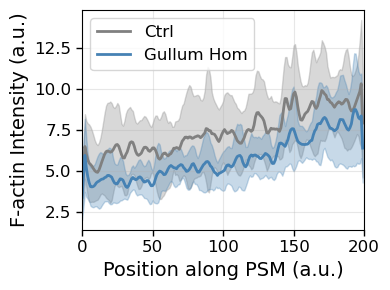

In [19]:
# # phalloidin 250121-24ss ctrl vs gullum
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Assuming `phal` and `phal_gullum` are your DataFrames

# Calculate mean and standard deviation for `phal`
mean_profile_phal = phal.mean(axis=1)
std_profile_phal = phal.std(axis=1)

# Calculate mean and standard deviation for `phal_gullum`
mean_profile_gullum = phal_gullum.mean(axis=1)
std_profile_gullum = phal_gullum.std(axis=1)

# X-axis positions
x = np.arange(len(mean_profile_phal))

# Create a single plot
fig, ax = plt.subplots(figsize=(4, 3))

# Plot the mean ± SD for `phal`
ax.plot(mean_profile_phal, color='gray', linewidth=2, label='Ctrl')
ax.fill_between(x, mean_profile_phal - std_profile_phal, mean_profile_phal + std_profile_phal, 
                color='gray', alpha=0.3)

# Plot the mean ± SD for `phal_gullum`
ax.plot(mean_profile_gullum, color='steelblue', linewidth=2, label='Gullum Hom')
ax.fill_between(x, mean_profile_gullum - std_profile_gullum, mean_profile_gullum + std_profile_gullum, 
                color='steelblue', alpha=0.3)

# Customize the plot appearance
ax.set_xlabel('Position along PSM (a.u.)', fontsize=14)
ax.set_ylabel('F-actin Intensity (a.u.)', fontsize=14)
ax.tick_params(width=1, length=4, labelsize=12)
ax.set_xlim([0, 200])
ax.set_xticks(range(0, 201, 50))
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

# Adjust layout and save the plot
plt.tight_layout()
directory = os.path.dirname(file_path)  # Replace with your actual file path
current_date = datetime.now().strftime('%Y-%m-%d')
file_name = "ctrl_vs_gullum_mean+std"  # Replace with your actual file name (without extension)
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Display the plot
plt.show()


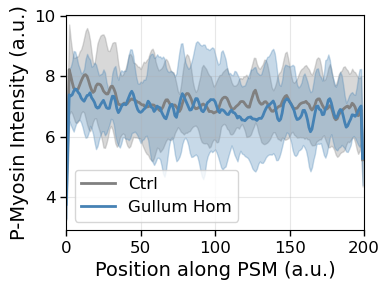

In [33]:
# pmyo 250121-24ss ctrl vs gullum
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Assuming `phal` and `phal_gullum` are your DataFrames

# Calculate mean and standard deviation for `phal`
mean_profile_phal =pmyo.mean(axis=1)
std_profile_phal = pmyo.std(axis=1)

# Calculate mean and standard deviation for `phal_gullum`
mean_profile_gullum = pmyo_gullum.mean(axis=1)
std_profile_gullum = pmyo_gullum.std(axis=1)

# X-axis positions
x = np.arange(len(mean_profile_phal))

# Create a single plot
fig, ax = plt.subplots(figsize=(4, 3))

# Plot the mean ± SD for `phal`
ax.plot(mean_profile_phal, color='gray', linewidth=2, label='Ctrl')
ax.fill_between(x, mean_profile_phal - std_profile_phal, mean_profile_phal + std_profile_phal, 
                color='gray', alpha=0.3)

# Plot the mean ± SD for `phal_gullum`
ax.plot(mean_profile_gullum, color='steelblue', linewidth=2, label='Gullum Hom')
ax.fill_between(x, mean_profile_gullum - std_profile_gullum, mean_profile_gullum + std_profile_gullum, 
                color='steelblue', alpha=0.3)

# Customize the plot appearance
ax.set_xlabel('Position along PSM (a.u.)', fontsize=14)
ax.set_ylabel('P-Myosin Intensity (a.u.)', fontsize=14)
ax.tick_params(width=1, length=4, labelsize=12)
ax.set_xlim([0, 200])
ax.set_xticks(range(0, 201, 50))
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

# Adjust layout and save the plot
plt.tight_layout()
directory = os.path.dirname(file_path)  # Replace with your actual file path
current_date = datetime.now().strftime('%Y-%m-%d')
file_name = "ctrl_vs_gullum_mean+std"  # Replace with your actual file name (without extension)
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Display the plot
plt.show()


# Intensity profiles from Thresholded Images 

Calculates mean intensities of pixels above 0 along the x-axis (rows) of a 2D image array (already straightened in Image J) and exports the result as a dataframe combining the single-axis arrays.

### image functions

In [9]:
def positive_pixel_mean_intensities(image_array):
    """

    
    Parameters:
        image_array (numpy.ndarray): A 2D array representing the image.
    
    Returns:
        numpy.ndarray: A 1D array of mean intensities along the x-axis.
    """
    if not isinstance(image_array, np.ndarray):
        raise ValueError("Input must be a numpy array.")
    if len(image_array.shape) != 2:
        raise ValueError("Input must be a 2D array.")
    
    # Transpose the image so that columns become rows
    image_array = image_array.T  # Swap axes: x-axis and y-axis

    mean_intensities = []
    for row in image_array:  # Now iterate over the original x-axis (now rows)
        non_zero_pixels = row[row > 0]  # Select pixels with intensity above 0
        if len(non_zero_pixels) > 0:
            mean_intensity = np.mean(non_zero_pixels)
        else:
            mean_intensity = 0  # If no non-zero pixels, mean is set to 0
        mean_intensities.append(mean_intensity)
    
    return np.array(mean_intensities)

def process_images_in_folder(folder_path):
    """
    Processes all images in a folder to calculate mean intensities of non-zero
    pixels along the x-axis and creates a DataFrame with filenames as column headers.

    Parameters:
        folder_path (str): Path to the folder containing images.

    Returns:
        pandas.DataFrame: A DataFrame where each column corresponds to an image file,
                          and each row contains mean intensities along the x-axis.
    """
    if not os.path.isdir(folder_path):
        raise ValueError("The provided folder path is invalid.")
    
    # Initialize an empty dictionary to store results
    data = {}
    
    max_length = 0  # Variable to keep track of the maximum length of mean intensities
    
    # Loop through files in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        # Ensure the file is an image (you can add more extensions if needed)
        if file_name.lower().endswith(('.tif', '.tiff')):
            try:
                print(f"Processing image: {file_name}")  # Debugging line
                # Read the image as a 2D array (grayscale)
                image = imread(file_path, as_gray=True)  # Load image in grayscale
                
                # Ensure the image is a NumPy array
                if not isinstance(image, np.ndarray):
                    raise ValueError(f"File {file_name} is not a valid image.")
                
                # Calculate mean intensities using the previously defined function
                mean_intensities = positive_pixel_mean_intensities(image)
                
                # Update the maximum length (the longest mean intensities array)
                max_length = max(max_length, len(mean_intensities))
                
                # Add the results to the dictionary
                data[file_name] = mean_intensities
            
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")
    
    # If no data was added to the dictionary, print a message
    if not data:
        print("No images were processed or no valid images found.")
    
    # Pad all arrays to ensure they have the same length
    for key in data:
        current_length = len(data[key])
        if current_length < max_length:
            # Pad with NaN or zero
            padding = [np.nan] * (max_length - current_length)
            data[key] = np.concatenate([data[key], padding])
    
    # Convert the dictionary into a DataFrame
    if data:
        df = pd.DataFrame(data)
        return df
    else:
        return pd.DataFrame()  # Return empty DataFrame if no valid images were processed

### form dataframe

In [28]:
file_path = '/Volumes/upoates/common/Feyza/data_BIOP/241206-pmyosin-yap_loopingbg(good)/pmyosin-midPSM-snaps/straightened'
df_thr = process_images_in_folder(file_path)
df_resized = resize_columns(df_thr,200);
df_smooth = apply_moving_average(df_resized, 10);
df_norm = normalize_columns(df_smooth)
df_thr = df_norm

df_thr


Processing image: pos7-straightened.tif
Processing image: pos1-straightened.tif
Processing image: Result of condition3-40xgly-01-2.tif
Processing image: pos4-straightened.tif
Processing image: Result of newprot-pmyo568-40x-p5-2.tif
Processing image: Result of newprot-pmyo568-40x-p6-1_segmentation-1.tif
Processing image: pos5-straightened.tif
Processing image: pos3-straightened.tif
Processing image: pos6-straightened.tif
Processing image: Result of newprot-pmyo568-40x-p7-1_segmentation-1.tif
Processing image: pos2-straightened.tif


,pos7-straightened.tif,pos1-straightened.tif,Result of condition3-40xgly-01-2.tif,pos4-straightened.tif,Result of newprot-pmyo568-40x-p5-2.tif,Result of newprot-pmyo568-40x-p6-1_segmentation-1.tif,pos5-straightened.tif,pos3-straightened.tif,pos6-straightened.tif,Result of newprot-pmyo568-40x-p7-1_segmentation-1.tif,pos2-straightened.tif
0,0.539544,0.586990,0.471968,0.337263,0.407692,0.588298,0.427285,0.499905,0.586144,0.457321,0.631192
1,0.639941,0.727110,0.551370,0.410176,0.476503,0.684706,0.496199,0.597437,0.698789,0.548083,0.742145
2,0.711058,0.820412,0.641844,0.502117,0.532578,0.760909,0.571971,0.729841,0.774889,0.632927,0.808778
3,0.783684,0.881222,0.755324,0.574033,0.582534,0.832530,0.653565,0.801130,0.876347,0.712327,0.869168
4,0.868795,0.934475,0.849960,0.634121,0.630275,0.913931,0.734278,0.903816,0.967364,0.807031,0.923646
...,...,...,...,...,...,...,...,...,...,...,...
195,0.747865,0.696230,0.833847,0.869659,0.937306,0.912929,0.618918,0.773566,0.726159,0.855121,0.702093
196,0.658494,0.625708,0.750050,0.793205,0.820546,0.810702,0.542830,0.663786,0.644996,0.804183,0.649287
197,0.591526,0.578138,0.678303,0.747635,0.713835,0.690767,0.488368,0.579509,0.574211,0.713757,0.583798
198,0.531659,0.519124,0.565032,0.669922,0.628705,0.593031,0.468072,0.515499,0.504216,0.653817,0.512773


### save dataframe

In [15]:
output_path = os.path.join(file_path, '241206_thresholded_straigneted_lineprofile.csv')
df_thr.to_csv(output_path, index=False)

# Results

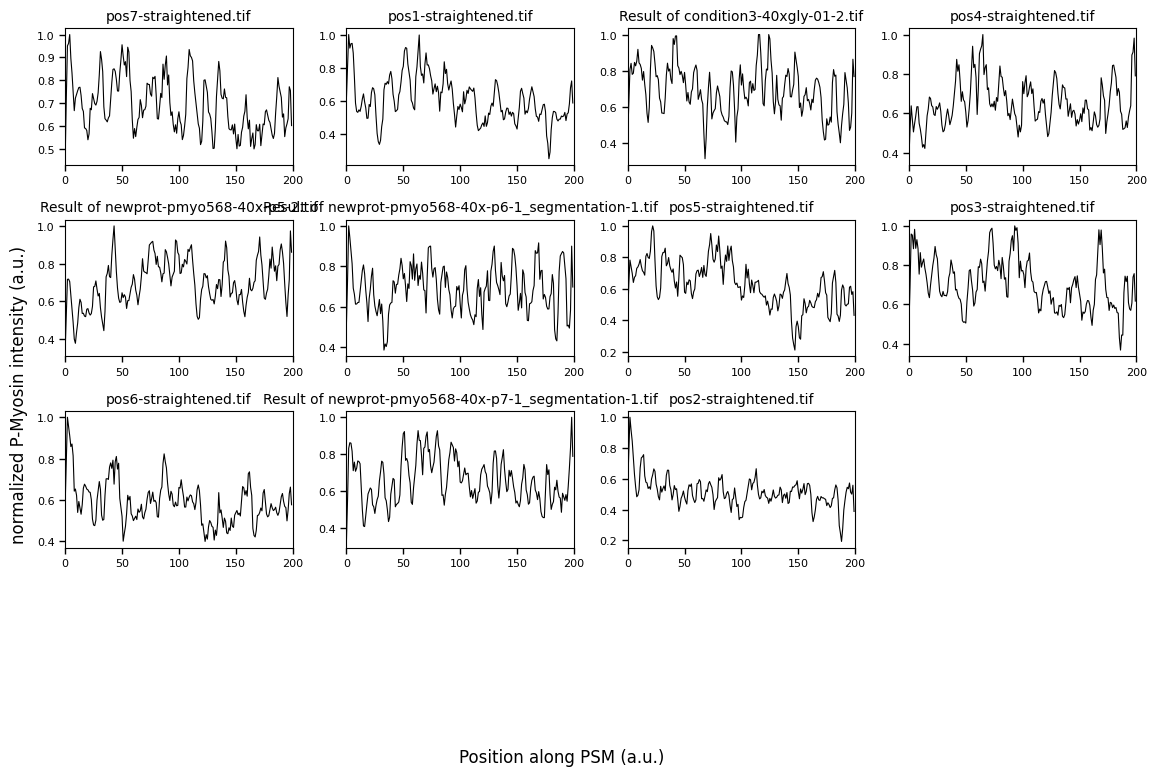

In [ ]:
# 241206 pmyosin thresholded straightened

fig, axes = plt.subplots(4, 4, figsize=(12, 8))  # Adjust figsize to fit the panel
axes = axes.flatten()  # Flatten the axes for easy iteration

for i, column in enumerate(df_thr.columns):
    ax = axes[i]
    ax.plot(df_thr[column], color='black', linewidth=0.8)  # Black line, smaller width
    
    # Customize each subplot
    ax.set_xlim([0, 200])
    ax.set_xticks(range(0, 201, 50))
    ax.tick_params(width=1, length=4, labelsize=8)  # Smaller ticks and labels
    ax.set_title(column, fontsize=10)  # Add column name as title

for j in range(len(df_thr.columns), len(axes)):
    fig.delaxes(axes[j])

fig.text(0.5, 0.04, 'Position along PSM (a.u.)', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'normalized P-Myosin intensity (a.u.)', va='center', rotation='vertical', fontsize=12)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Make space for global labels

directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'241206_panel_plotted_{current_date}_{file_name}.svg')  # Save panel plot

plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


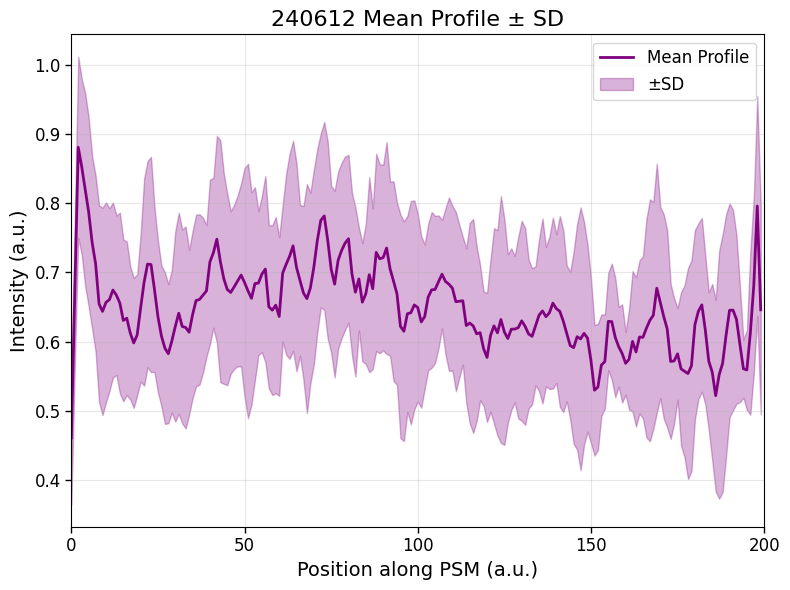

In [27]:
# myosin-P 241206 thresholded
data_name = '240612'
mean_profile = df_thr.mean(axis=1)
std_profile = df_thr.std(axis=1)

x = np.arange(len(mean_profile))

# Create a single plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(mean_profile, color='purple', linewidth=2, label='Mean Profile')
ax.fill_between(x, mean_profile - std_profile, mean_profile + std_profile, color='purple', alpha=0.3, label='±SD')

# Customize the plot appearance
ax.set_xlabel('Position along PSM (a.u.)', fontsize=14)
ax.set_ylabel('Intensity (a.u.)', fontsize=14)
ax.tick_params(width=1, length=4, labelsize=12)
ax.set_xlim([0, 200])
ax.set_xticks(range(0, 201, 50))
ax.legend(fontsize=12)
ax.set_title("240612 Mean Profile ± SD", fontsize=16)
ax.grid(True, alpha=0.3)

# Adjust layout and save the plot
plt.tight_layout()
directory = os.path.dirname(file_path)  # Replace with your actual file path
current_date = datetime.now().strftime('%Y-%m-%d')
file_name = "thresholded_straightened_mean+std"  # Replace with your actual file name (without extension)
save_path = os.path.join(directory, f'{data_name}_plotted_{current_date}_{file_name}.svg')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Display the plot
plt.show()